# Importing needed libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb 


In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Oredering Categorical ordinal data

In [4]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [5]:
cat_type=pd.api.types.CategoricalDtype(categories=['some high school','high school','some college',"associate's degree","bachelor's degree","master's degree"],ordered=True)
df['parental level of education']=df['parental level of education'].astype(cat_type)

In [6]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [7]:
cat_type=pd.api.types.CategoricalDtype(categories=['free/reduced','standard'],ordered=True)
df['lunch']=df['lunch'].astype(cat_type)

In [8]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Engineering a new feature

In [9]:
df['percentage']=(df['math score']+df['reading score']+df['writing score'])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# Exploratory Analysis

## Univariate Analysis

### The frequency of diffrent parent level education
#### this plot is plotted to inform about the diffrent parental levels of education and their frequency in data sets

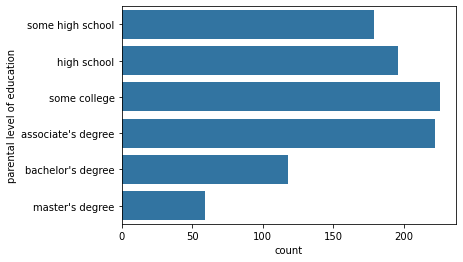

In [10]:
sb.countplot(data=df,y='parental level of education',color=sb.color_palette()[0]);

### The frequency of diffrent races or groups
#### This plot is constructed to determine the minor and most commpn races in the dataset to be analyzed later to determine is there any bias or discrimination against certain races  

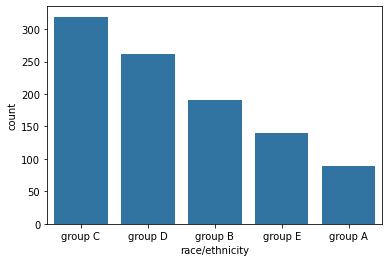

In [11]:
sb.countplot(data=df,x='race/ethnicity',order=df['race/ethnicity'].value_counts().index,color=sb.color_palette()[0]);

### The Distribution of reading scores
#### This plot is constructed to find out the distribution of reading scores , most common score ranges and most uncommon score ranges

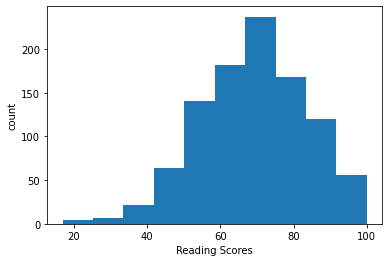

In [12]:
plt.hist(df['reading score']);
plt.xlabel('Reading Scores');
plt.ylabel('count');

### The distribution of writing scores
#### This plot is constructed to find out the distribution of writing scores , most common score ranges and most uncommon score ranges

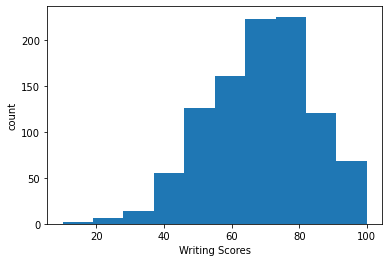

In [13]:
plt.hist(df['writing score']);
plt.xlabel('Writing Scores');
plt.ylabel('count');

### The distribution of math scores
#### This plot is constructed to find out the distribution of math scores , most common score ranges and most uncommon score ranges

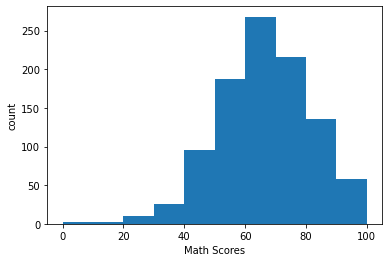

In [14]:
plt.hist(df['math score']);
plt.xlabel('Math Scores');
plt.ylabel('count');

## Bivariate Data Exploration

### figuring out the effect of test preparation course status on reading score

C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


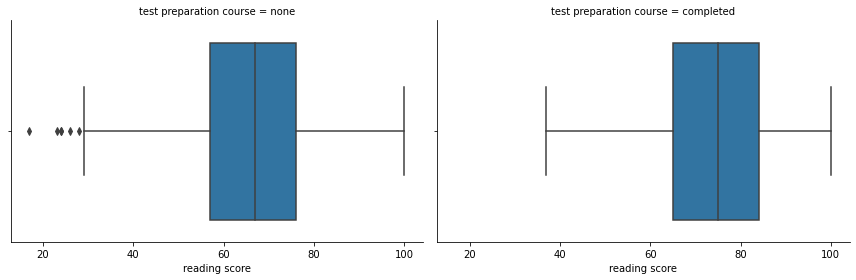

In [15]:
g=sb.FacetGrid(data=df,col='test preparation course',aspect=1.5,height=4);
g.map(sb.boxplot,'reading score');


### we can see a higher interquartile range of people who took the course than people who didn't in reading scores which indicates improved reading scores for people who took the course

### figuring out the effect of test preparation course status on writing score

C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


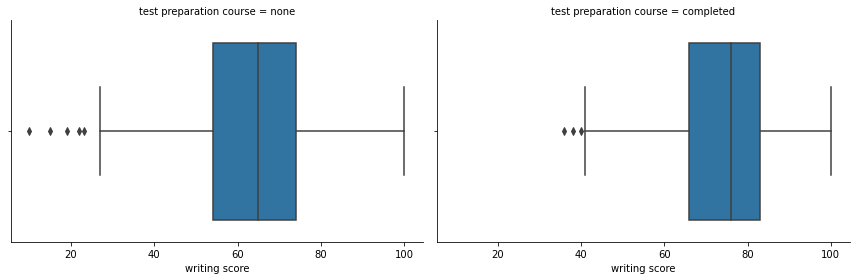

In [16]:
g=sb.FacetGrid(data=df,col='test preparation course',aspect=1.5,height=4);
g.map(sb.boxplot,'writing score');

### we can see a higher interquartile range of people who took the course than people who didn't in writing scores which indicates improved writing scores for people who took the course

### figuring out the effect of test preparation course status on math score

C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


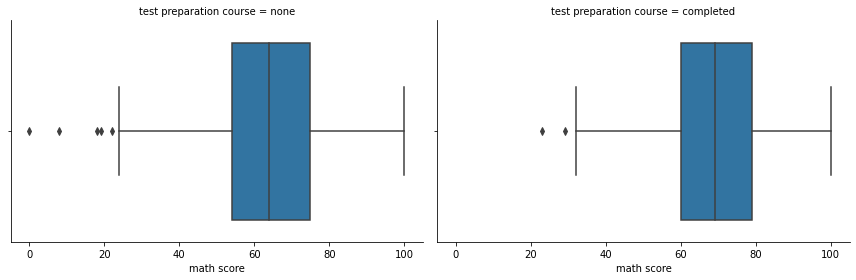

In [17]:
g=sb.FacetGrid(data=df,col='test preparation course',aspect=1.5,height=4);
g.map(sb.boxplot,'math score');

### we can see a higher interquartile range of people who took the course than people who didn't in math scores which indicates improved math scores for people who took the course

### figuring out the effect of test preparation course status on total percentage


C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


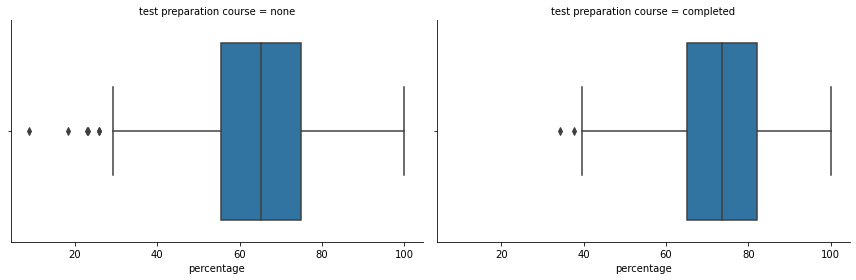

In [18]:
g=sb.FacetGrid(data=df,col='test preparation course',aspect=1.5,height=4);
g.map(sb.boxplot,'percentage');

### we can see a higher interquartile range of people who took the course than people who didn't in total percentage which indicates improved percentages for people who took the course

### figuring out the relationship between parental level degree and percentage


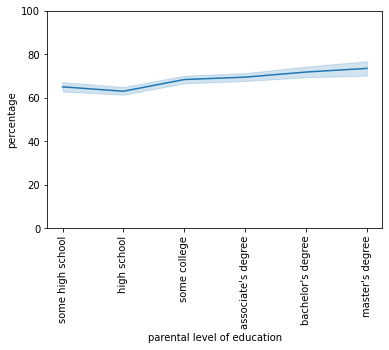

In [19]:
sb.lineplot(data=df,x='parental level of education',y='percentage',color=sb.color_palette()[0]);
plt.ylim(0,100);
plt.xticks(rotation=90);

### We can conclude that there's no correlation between percentage and parent degree

### figuring out if race is at all correlated with total percentages

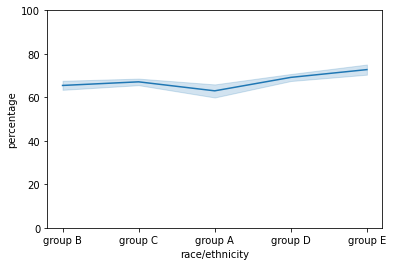

In [20]:
sb.lineplot(data=df,x='race/ethnicity',y='percentage');
plt.ylim(0,100);

### We can conclude that there's no correlation between percentage and race or group

### figuring out the relationship between lunch plan and total percentage


C:\Users\mamou\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


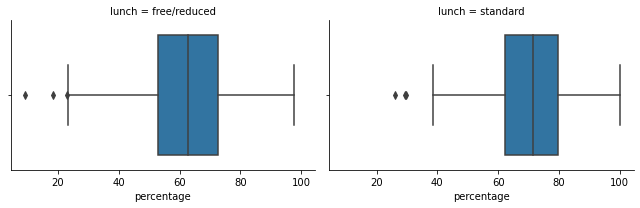

In [21]:
g=sb.FacetGrid(data=df,col='lunch',aspect=1.5);
g.map(sb.boxplot,'percentage');

### We can see the people with standard lunch plans manged to have higher interquartile range than the people with free/reduced lunch 

### finding the correaltion between scores between test subjects and total percentage 


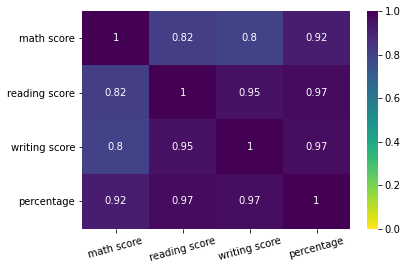

In [22]:
sb.heatmap(df.corr(),annot=True,cmap='viridis_r',vmin=0);
plt.xticks(rotation=15);

### Writing and reading have very strong correlation with each other while having a slightly weaker yet strong correlation with Maths Score

## Multivariate Analysis

### since lunch and test preparation course are the most potential factors in total percentage we trying to find the relationship between the percentage against the two variables 4 possible states

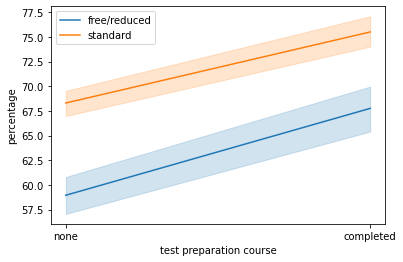

In [23]:
sb.lineplot(data=df,x='test preparation course',y='percentage',hue='lunch');
plt.legend();

#### People with standard lunch and who took the course scored the highest on average while people with reduced lunch and didn't take the course scored the lowest on average 
#### People with standard lunch and didn't take the course and people with free/reduced lunch who took the course scored nearly the same

# Explanatory Data Analysis

In [24]:
#bootsraping the percentage means diffrences between people who completed the course and people who didn't
means=[]
for _ in range(10000):
    samp=df.sample(df.shape[0],replace = True)
    means.append(samp[samp['test preparation course']=='completed']['percentage'].mean()-samp[samp['test preparation course']=='none']['percentage'].mean())

### The distribution of the diffrence on average between people who took the course and people who didn't

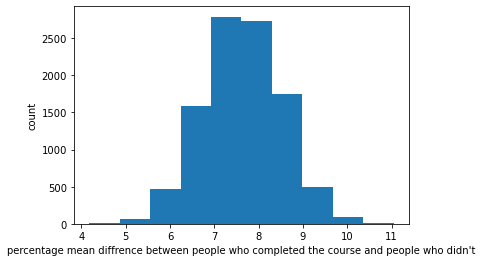

In [25]:
plt.hist(means)
plt.xlabel("percentage mean diffrence between people who completed the course and people who didn't");
plt.ylabel('count');

### Histogram suggests that people who completed the course scored better on average 7.6% with standard deviation of 0.9%

## Hyp test 1
### H0 : mean percentage of course completed - mean percentage of couse not completed <= 0 
### HA : mean percentage of course completed - mean percentage of couse not completed > 0 

In [26]:

null_vals=np.random.normal(0,np.std(means),len(means))

p_val = (null_vals>np.mean(means)).mean()
p_val

0.0

In [27]:
np.min(means),np.max(means)

(4.175269693154661, 11.043113149873761)

In [28]:
means=[]
for _ in range(10000):
    samp=df.sample(df.shape[0],replace = True)
    means.append(samp[samp['lunch']=='standard']['percentage'].mean()-samp[samp['lunch']=='free/reduced']['percentage'].mean())

### percentage mean diffrence between people who had standard lunch plan and people who had free or reduced lunch plan 

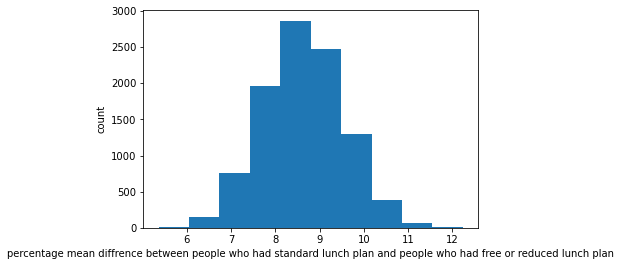

In [29]:
plt.hist(means);
plt.xlabel("percentage mean diffrence between people who had standard lunch plan and people who had free or reduced lunch plan");
plt.ylabel('count');

### Histogram suggests people with better lunch plans scored higher on average 8.64% with standard deviation of 0.92%

## Hyp test 2
### H0 : mean percentage of standard lunch - mean percentage of free/reduced lunch <= 0 
### HA : mean percentage of standard lunch - mean percentage of free/reduced lunch > 0 


In [30]:
null_vals=np.random.normal(0,np.std(means),len(means))
p_val = (null_vals>np.mean(means)).mean()
p_val

0.0

In [31]:
np.min(means),np.max(means)

(5.359753950247423, 12.237568030212401)

### with 0.0 pvalue we decide to reject the null hypothes

In [25]:
!jupyter nbconvert StudentsPerformanceAnalysis.ipynb --to slides --no-input --no-prompt


[NbConvertApp] Converting notebook StudentsPerformanceAnalysis.ipynb to slides
[NbConvertApp] Writing 752726 bytes to StudentsPerformanceAnalysis.slides.html
